## CSC 0620-01 Natural Language Technologies Spring 2021

Joseph Edradan <br>
04/20/2021 <br>
Source: https://www.kaggle.com/kstathou/word-embeddings-logistic-regression <br>

#### Submission for hands-on workshop on April 15th

<ol>
  <li> Read and understand this article: <a href="https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92">"A Beginner’s Guide to Word Embedding with Gensim Word2Vec Model"</li>
  <li>Create a copy of the following Jupyter notebook (or export it as python program):<a href="https://www.kaggle.com/kstathou/word-embeddings-logistic-regression">https://www.kaggle.com/kstathou/word-embeddings-logistic-regression</a> In the new notebook (or program) add a detailed description in your own words of what is happening in each code block. 
</li>
</ol>

In [1]:
import os
import gensim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

import warnings
# Ignore all warning
# warnings.filterwarnings('ignore')

# Print current dir
print(os.listdir("."))

# Magic commadn for inline matplotlib plots
%matplotlib inline

['.ipynb_checkpoints', 'clf_output.csv', 'input', 'whats-cooking-kernels-only.zip', 'word-embeddings-logistic-regression.ipynb']


In [2]:
"""
Make pandas DataFrames of the test and training json files

"""
data = pd.read_json('./input/train.json')
test = pd.read_json('./input/test.json')

In [3]:
"""
Print the (rows, columns) of the json files
"""
print('Training data shape: {}'.format(data.shape))
print('Test data shape: {}'.format(test.shape))

Training data shape: (39774, 3)
Test data shape: (9944, 2)


In [4]:
# Print first 5 of data
data.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:
# Print first 5 of test
test.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [6]:
"""
Select data's cuisine column
"""

# Target variable
target = data.cuisine

In [7]:
"""
Add new column to "data" based on the length of the ingredients list

"""
data['ingredient_count'] = data.ingredients.apply(lambda x: len(x))

In [8]:
data.head()

,id,cuisine,ingredients,ingredient_count
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,22213,indian,"[water, vegetable oil, wheat, salt]",4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20


In [9]:
"""
list_temp = []

for sublist in lst:
    for item in sublist:
        list_temp.append(item)
"""


def flatten_lists(lst):
    """Remove nested lists."""
    return [item for sublist in lst for item in sublist]

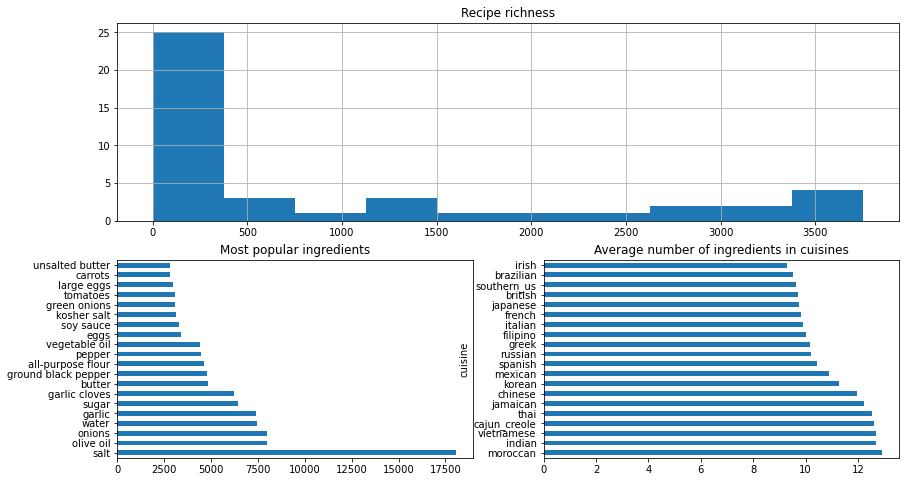

In [10]:
"""
Create matplotlib sub plot
"""

# Set dimensions of plot dimenions
f = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(2, 2)

# Sub plot for Row 0, Column All
ax1 = plt.subplot(gs[0, :])
data.ingredient_count.value_counts().hist(ax=ax1)
ax1.set_title('Recipe richness', fontsize=12)

# Sub plot for Row 1, Column 0
ax2 = plt.subplot(gs[1, 0])
pd.Series(flatten_lists(list(data['ingredients']))).value_counts()[
    :20].plot(kind='barh', ax=ax2)
ax2.set_title('Most popular ingredients', fontsize=12)

# Sub plot for Row 1, Column 1
ax3 = plt.subplot(gs[1, 1])
data.groupby('cuisine').mean()['ingredient_count'].sort_values(
    ascending=False).plot(kind='barh', ax=ax3)
ax3.set_title('Average number of ingredients in cuisines', fontsize=12)

# Plot graph
plt.show()

In [11]:
# Print the rows based on the column data.ingredients
print(data.ingredients)

0        [romaine lettuce, black olives, grape tomatoes...
1        [plain flour, ground pepper, salt, tomatoes, g...
2        [eggs, pepper, salt, mayonaise, cooking oil, g...
3                      [water, vegetable oil, wheat, salt]
4        [black pepper, shallots, cornflour, cayenne pe...
                               ...                        
39769    [light brown sugar, granulated sugar, butter, ...
39770    [KRAFT Zesty Italian Dressing, purple onion, b...
39771    [eggs, citrus fruit, raisins, sourdough starte...
39772    [boneless chicken skinless thigh, minced garli...
39773    [green chile, jalapeno chilies, onions, ground...
Name: ingredients, Length: 39774, dtype: object


In [12]:
"""
Create Gensim model for Word2Vec
    sentences = list of lists where the inner list contains tokens (e.g. romaine lettuce, black olives, etc)
    size = vector_size = number of components of the vector
    window = the number of words closest to the given word (top k)
    min_count = the min number for the frequncy of a given word, basically a word to be considered must be above this min
    iter = epochs = number of full passes of the dataset
    
"""
# Feed a word2vec with the ingredients
w2v = gensim.models.Word2Vec(
    list(data.ingredients), size=350, window=10, min_count=2, iter=20)

Let's try some examples

In [13]:
"""
Print the most similar word to 'meat' using cosine similarity

"""
w2v.wv.most_similar(['meat'])

[('beef', 0.6888976097106934),
 ('pork', 0.6862984895706177),
 ('beef tongue', 0.6742573976516724),
 ('ground beef', 0.6198930144309998),
 ('pork chops', 0.5807772278785706),
 ('beef brisket', 0.5805191993713379),
 ('broth', 0.5693376064300537),
 ('chicken', 0.5665876865386963),
 ('chuck roast', 0.5616384744644165),
 ('boneless beef chuck roast', 0.5574293732643127)]

In [14]:
"""
Print the most similar word to 'meat' using cosine similarity

"""
w2v.wv.most_similar(['chicken'])

[('chicken breasts', 0.7586368322372437),
 ('boneless chicken breast', 0.7281632423400879),
 ('chicken thighs', 0.7201734781265259),
 ('boneless skinless chicken breasts', 0.7098185420036316),
 ('chicken pieces', 0.679476261138916),
 ('boneless chicken skinless thigh', 0.6389967799186707),
 ('cooked chicken', 0.6307079792022705),
 ('chicken meat', 0.6273239850997925),
 ('skinless chicken breasts', 0.6029938459396362),
 ('boneless skinless chicken breast halves', 0.5949251055717468)]

In [15]:
"""
list_temp = [Get word from doc if the word is in the w2v model's vocab]

Add all vector representations of each word from list_temp into 1 vector where each component is the mean of their corresponding
components from all words.

Basically, get 1 vector based on all the other vectors using a mean of all components in that component's position based on 
each word.

"""


def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""

    # Get word from doc if the word is in the model's vocab
    doc = [word for word in doc if word in w2v.wv.vocab]

    # Return a vector containing the mean of the each component based on all the other vectors
    return np.mean(w2v.wv[doc], axis=0)

In [16]:
"""
For each cell data (list of words) in data.ingredients and test.ingredients, call document_vector on that list of words to
get a 1 vector where each component is the mean of their corresponding component's index.

"""
data['doc_vector'] = data.ingredients.apply(document_vector)
test['doc_vector'] = test.ingredients.apply(document_vector)

#### Idk why this is markdown

lb = LabelEncoder()

y = lb.fit_transform(target)

In [17]:
"""
Recall that the variable 'target' was the column data.cuisine

Use a label encoder to convert a word (Cuisine) to an int,
basically map a word to an int

"""
lb = LabelEncoder()
y = lb.fit_transform(target)

In [18]:
"""
Printing of the mapping of the label number and it's corresponding word (Cuisine) using zip

"""
pd_df_temp = pd.DataFrame(zip(y, lb.inverse_transform(y)), columns=[
                          "Label number", "Cuisine"])
pd_df_temp.head(10)

,Label number,Cuisine
0,6,greek
1,16,southern_us
2,4,filipino
3,7,indian
4,7,indian
5,10,jamaican
6,17,spanish
7,9,italian
8,13,mexican
9,9,italian


In [19]:
"""
Printing of the mapping of the label number and it's corresponding word (Cuisine) using transpose

"""
pd_df_temp = pd.DataFrame([y, lb.inverse_transform(y)], index=[
                          "Label number", "Cuisine"]).transpose()
pd_df_temp.head(10)

,Label number,Cuisine
0,6,greek
1,16,southern_us
2,4,filipino
3,7,indian
4,7,indian
5,10,jamaican
6,17,spanish
7,9,italian
8,13,mexican
9,9,italian


In [20]:
"""
Make a list of the training dataset of data's column doc_vector 
Make a list of the testing dataset of test's column doc_vector 
"""
X = list(data['doc_vector'])
X_test = list(test['doc_vector'])

In [21]:
"""
Make a Logistic Regression classifier

Warning:
    Will not converge with 100 iterations, not even 1000 will work
    
"""
clf = LogisticRegression(C=100, max_iter=100)

In [22]:
"""
Recall what X and y are

X is a matrix of vectors
y is the label number

So X with y is a vector and a label number together

"""
print("Trainig dataset X")
print("Amount of Rows:", data['doc_vector'].shape)
print("Amount of components per vector:", data['doc_vector'][0].shape)
print("Head of data['doc_vector']:")
print(data['doc_vector'].head())
print()
print("-"*100)
print()
print("Trainig dataset X")
print("y was the label number for each word (Cuisine)")
print(pd.DataFrame(y).head())

Trainig dataset X
Amount of Rows: (39774,)
Amount of components per vector: (350,)
Head of data['doc_vector']:
0    [0.43656465, 0.040161446, 0.45400757, 0.036415...
1    [-0.40479895, -0.14067498, -0.122548886, 0.046...
2    [-0.28444636, -0.036674354, -0.17424917, 0.380...
3    [-0.27767453, 0.18196926, 0.11820327, 0.015158...
4    [-0.17181876, 0.059060507, 0.049089707, 0.3113...
Name: doc_vector, dtype: object

----------------------------------------------------------------------------------------------------

Trainig dataset X
y was the label number for each word (Cuisine)
    0
0   6
1  16
2   4
3   7
4   7


In [23]:
"""
Fit the model based on the training data X (vectors) to y (label numbers)


"""
clf.fit(X, y)

C:\Users\Joseph\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

In [24]:
"""
Predict y_test using X_test (testing dataset)

Then convert the label number from y_test to the actual word (Cuisine)
"""

# From X_test predict output label number into y_test
y_test = clf.predict(X_test)

# From y_test (list of lables) transform it from labal number to acutal name (Cuisine)
y_pred = lb.inverse_transform(y_test)

In [25]:
pd.DataFrame(y_test, columns=["Label number"]).head()

,Label number
0,1
1,5
2,9
3,2
4,9


In [26]:
pd.DataFrame([lb.inverse_transform(y_test), y_test], index=[
             "Word (Cuisine)", "Label number"]).transpose().head()

,Word (Cuisine),Label number
0,british,1
1,french,5
2,italian,9
3,cajun_creole,2
4,italian,9


In [27]:
"""
Based on the id of the testing dataset (Recall that you only get an id and the ingredients in this dataset),
Predict what type of cuisine that id represents based on your classifier's results.

Remember id and ingredients are tied together
Remember y_pred is a cuisine.

"""

# Get the test's ids only
test_id = [id_ for id_ in test.id]

"""
Make a DataFrame of the id from test and the cuisine that the classifier predicted. Recall you needed to transform the output of
what the classifier predicted which was a label number so you need to convert that label number to an actual word (Cuisine)

"""
sub = pd.DataFrame({'id': test_id, 'cuisine': y_pred},
                   columns=['id', 'cuisine'])

# Export predicted into a csv file
sub.to_csv('clf_output.csv', index=False)